In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import  *
from numpy import *
from sklearn.linear_model import LinearRegression
inf552= pd.read_csv("C:\\Users\\DELL\\Desktop\\INF552\\HM2\\CCPP\\Folds5x2_pp.csv")

In [2]:
print('in this data set, 9568 rows × 5 columns')
print('the rows represent Number of Instances and the first 4 columns represent predictors(independent variables) and the last one is the response(dependent variable)')

in this data set, 9568 rows × 5 columns
the rows represent Number of Instances and the first 4 columns represent predictors(independent variables) and the last one is the response(dependent variable)


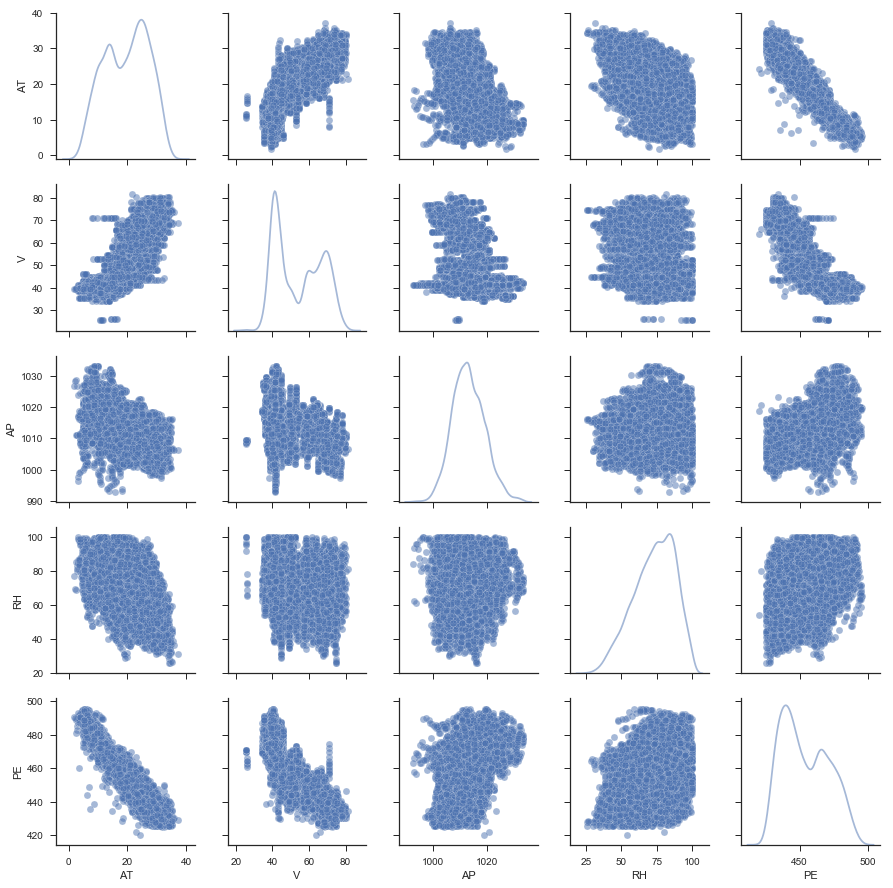

In [3]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(inf552, plot_kws={"alpha":0.5}, diag_kws={"alpha":0.5},diag_kind='kde')

In [4]:
print('from pairwise scatterplots of all the varianbles in the data set, we can find:' )
print('The correlation between AT and V is strong postive')
print('The correlation between AT and AP is moderately negative')
print('The correlation between AT and RH is moderately negative')
print('The correlation between AT and PE is strong negative')
print('The correlation between V and AP is weak negative')
print('The correlation between V and RH is weak negative')
print('The correlation between V and PE is strong negative')
print('The correlation between AP and RH is lack')
print('The correlation between AP and PE is moderately positive')
print('The correlation between RH and PE is weak positive')
pd.DataFrame(np.corrcoef(inf552,rowvar=False),index = inf552.columns.values, columns = inf552.columns.values)

from pairwise scatterplots of all the varianbles in the data set, we can find:
The correlation between AT and V is strong postive
The correlation between AT and AP is moderately negative
The correlation between AT and RH is moderately negative
The correlation between AT and PE is strong negative
The correlation between V and AP is weak negative
The correlation between V and RH is weak negative
The correlation between V and PE is strong negative
The correlation between AP and RH is lack
The correlation between AP and PE is moderately positive
The correlation between RH and PE is weak positive


,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [5]:
inf552.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
#the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset
from prettytable import PrettyTable 
table=PrettyTable([" "," mean","median","range", "Q1","Q3", "interquartile ranges"])
table.add_row(["AT",19.651231,20.345000,37.110000-1.810000,13.510000,25.720000,25.720000-13.510000])
table.add_row(["V",54.305804,52.080000,81.560000-25.360000,41.740000,66.540000,66.540000-41.740000])
table.add_row(["AP",1013.259078,1012.940000,1033.300000-992.890000,1009.100000,1017.260000,1017.260000-1009.100000])
table.add_row(["RH",73.308978,74.975000,100.160000-25.560000,63.327500,84.830000,84.830000-63.327500])
table.add_row(["PE",454.365009,451.550000,495.760000-420.260000,439.750000,468.430000,468.430000-439.750000])
print(table)

+----+-------------+---------+-------------------+---------+---------+----------------------+
|    |     mean    |  median |       range       |    Q1   |    Q3   | interquartile ranges |
+----+-------------+---------+-------------------+---------+---------+----------------------+
| AT |  19.651231  |  20.345 |        35.3       |  13.51  |  25.72  |  12.209999999999999  |
| V  |  54.305804  |  52.08  |        56.2       |  41.74  |  66.54  |  24.800000000000004  |
| AP | 1013.259078 | 1012.94 | 40.40999999999997 |  1009.1 | 1017.26 |  8.159999999999968   |
| RH |  73.308978  |  74.975 |        74.6       | 63.3275 |  84.83  |  21.502499999999998  |
| PE |  454.365009 |  451.55 |        75.5       |  439.75 |  468.43 |  28.680000000000007  |
+----+-------------+---------+-------------------+---------+---------+----------------------+


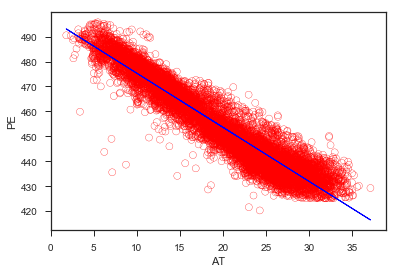

+-----------+--------------------+----------------------+--------------------+---------+
|           |     Coefficient    |      Std.Error       |    t-statistic     | p-value |
+-----------+--------------------+----------------------+--------------------+---------+
| Intercept | 497.03411989276697 | 0.15643382142090123  | 3177.2804332091696 |   0.0   |
|     AT    | -2.171319958517798 | 0.007443287125657964 | -291.7151954319994 |   0.0   |
+-----------+--------------------+----------------------+--------------------+---------+
AT(T-test):                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
According to the t-test,we reject the null,there is a statistically signiﬁcant association between AT and the PE


In [7]:
import statsmodels.api as sm
dataSet_x11 = inf552.loc[:, 'AT'].values
dataSet_x12 = sm.add_constant(dataSet_x11)
dataSet_y = inf552.loc[:, 'PE'].values
results1 = sm.OLS(dataSet_y, dataSet_x12 ).fit()
plt.scatter(dataSet_x11, dataSet_y,  color='',marker='o', edgecolors='red')
plt.plot(dataSet_x11, results1.predict(dataSet_x12), color='blue', linewidth=1)
plt.xlabel('AT');plt.ylabel('PE');
plt.show()
table1=PrettyTable([" "," Coefficient","Std.Error","t-statistic", "p-value"])
table1.add_row(["Intercept",results1.params[0],results1.bse[0],results1.tvalues[0],results1.pvalues[0]])
table1.add_row(["AT",results1.params[1],results1.bse[1],results1.tvalues[1],results1.pvalues[1]])
print(table1)
print('AT(T-test):',results1.t_test([0,1]))
print('According to the t-test,we reject the null,there is a statistically signiﬁcant association between AT and the PE')

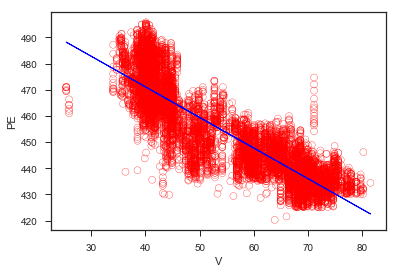

+-----------+---------------------+----------------------+---------------------+---------+
|           |      Coefficient    |      Std.Error       |     t-statistic     | p-value |
+-----------+---------------------+----------------------+---------------------+---------+
| Intercept |   517.801526308386  |  0.3778971421778296  |  1370.2181586351362 |   0.0   |
|     V     | -1.1681351265557098 | 0.006775665282736544 | -172.40153959965468 |   0.0   |
+-----------+---------------------+----------------------+---------------------+---------+
V(T-test):                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.1681      0.007   -172.402      0.000      -1.181      -1.155
According to the t-test,we reject the null,there is a statistically signiﬁcant association between V and the PE


In [8]:
dataSet_x21 = inf552.loc[:, 'V'].values
dataSet_x22 = sm.add_constant(dataSet_x21)
results2 = sm.OLS(dataSet_y, dataSet_x22 ).fit()
plt.scatter(dataSet_x21, dataSet_y,  color='',marker='o', edgecolors='red')
plt.plot(dataSet_x21, results2.predict(dataSet_x22), color='blue', linewidth=1)
plt.xlabel('V');plt.ylabel('PE');
plt.show()
table2=PrettyTable([" "," Coefficient","Std.Error","t-statistic", "p-value"])
table2.add_row(["Intercept",results2.params[0],results2.bse[0],results2.tvalues[0],results2.pvalues[0]])
table2.add_row(["V",results2.params[1],results2.bse[1],results2.tvalues[1],results2.pvalues[1]])
print(table2)
print('V(T-test):',results2.t_test([0,1]))
print('According to the t-test,we reject the null,there is a statistically signiﬁcant association between V and the PE')

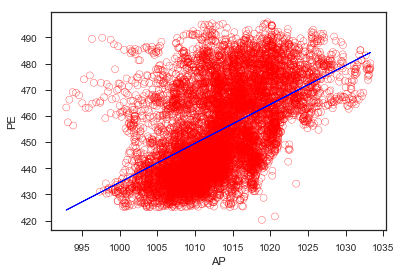

+-----------+---------------------+----------------------+---------------------+---------+
|           |      Coefficient    |      Std.Error       |     t-statistic     | p-value |
+-----------+---------------------+----------------------+---------------------+---------+
| Intercept | -1055.2609889844425 |   25.4594915473923   | -41.448627794474874 |   0.0   |
|     AP    |  1.489871673399116  | 0.025125907932584134 |  59.29623229523179  |   0.0   |
+-----------+---------------------+----------------------+---------------------+---------+
AP(T-test):                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4899      0.025     59.296      0.000       1.441       1.539
According to the t-test,we reject the null,there is a statistically signiﬁcant association between AP and the PE


In [9]:
dataSet_x31 = inf552.loc[:, 'AP'].values
dataSet_x32 = sm.add_constant(dataSet_x31)
results3 = sm.OLS(dataSet_y, dataSet_x32 ).fit()
plt.scatter(dataSet_x31, dataSet_y,  color='',marker='o', edgecolors='red')
plt.plot(dataSet_x31, results3.predict(dataSet_x32), color='blue', linewidth=1)
plt.xlabel('AP');plt.ylabel('PE');
plt.show()
table3=PrettyTable([" "," Coefficient","Std.Error","t-statistic", "p-value"])
table3.add_row(["Intercept",results3.params[0],results3.bse[0],results3.tvalues[0],results3.pvalues[0]])
table3.add_row(["AP",results3.params[1],results3.bse[1],results3.tvalues[1],results3.pvalues[1]])
print(table3)
print('AP(T-test):',results3.t_test([0,1]))
print('According to the t-test,we reject the null,there is a statistically signiﬁcant association between AP and the PE')

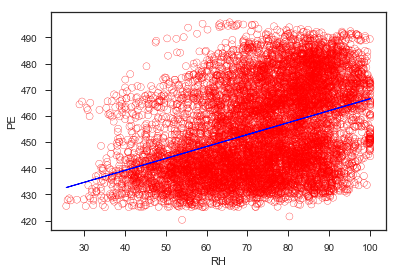

+-----------+---------------------+----------------------+-------------------+---------+
|           |      Coefficient    |      Std.Error       |    t-statistic    | p-value |
+-----------+---------------------+----------------------+-------------------+---------+
| Intercept |  420.96176615548376 |  0.8227113037852685  | 511.6761666196296 |   0.0   |
|     RH    | 0.45565010226298147 | 0.011006378807584876 |  41.3987297937608 |   0.0   |
+-----------+---------------------+----------------------+-------------------+---------+
RH(T-test):                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4557      0.011     41.399      0.000       0.434       0.477
According to the t-test,we reject the null,there is a statistically signiﬁcant association between RH and the PE


In [10]:
dataSet_x41 = inf552.loc[:, 'RH'].values
dataSet_x42 = sm.add_constant(dataSet_x41)
results4 = sm.OLS(dataSet_y, dataSet_x42 ).fit()
plt.scatter(dataSet_x41, dataSet_y,  color='',marker='o', edgecolors='red')
plt.plot(dataSet_x41, results4.predict(dataSet_x42), color='blue', linewidth=1)
plt.xlabel('RH');plt.ylabel('PE');
plt.show()
table4=PrettyTable([" "," Coefficient","Std.Error","t-statistic", "p-value"])
table4.add_row(["Intercept",results4.params[0],results4.bse[0],results4.tvalues[0],results4.pvalues[0]])
table4.add_row(["RH",results4.params[1],results4.bse[1],results4.tvalues[1],results4.pvalues[1]])
print(table4)
print('RH(T-test):',results4.t_test([0,1]))
print('According to the t-test,we reject the null,there is a statistically signiﬁcant association between RH and the PE')

outliers with high residuals(>4 or <-4 )might distort the regression and possibly be removed.


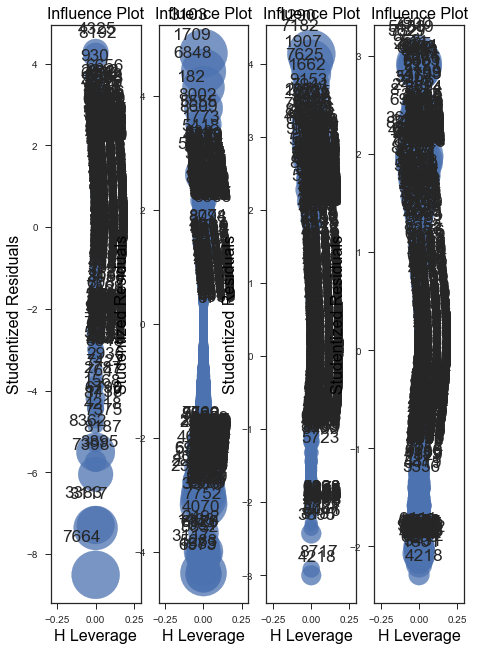

In [36]:
fig = plt.figure(figsize = (48, 100))
ax1 = fig.add_subplot(8, 25, 1)
sm.graphics.influence_plot(results1, alpha  = 0.05, ax = ax1, criterion="cooks")
ax2 = fig.add_subplot(8, 25, 2)
sm.graphics.influence_plot(results2, alpha  = 0.05, ax = ax2, criterion="cooks")
ax3 = fig.add_subplot(8, 25, 3)
sm.graphics.influence_plot(results3, alpha  = 0.05, ax = ax3, criterion="cooks")
ax4 = fig.add_subplot(8, 25, 4)
sm.graphics.influence_plot(results4, alpha  = 0.05, ax = ax4, criterion="cooks")
print('outliers with high residuals(>4 or <-4 )might distort the regression and possibly be removed.')

In [11]:
# Fit a multiple regression model to predict the response using all of the predictors
from statsmodels.formula.api import ols
formula0 = 'PE ~ AT + V + AP + RH '
results0 = ols(formula0, inf552).fit()
print('According to the t-test and p-value, for all the predictors we can reject the null hypothesis ')
results0.summary()

According to the t-test and p-value, for all the predictors we can reject the null hypothesis 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:21   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

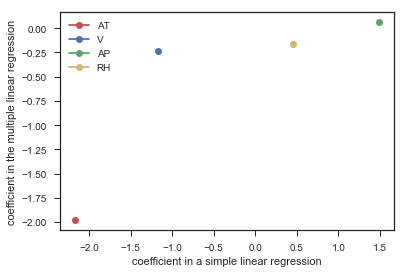

In [12]:
#compare results from 1c to your results from 1d
plt.plot(results1.params[1],results0.params[1],"r-o",label="AT")
plt.plot(results2.params[1],results0.params[2],"b-o",label="V")
plt.plot(results3.params[1],results0.params[3],"g-o",label="AP")
plt.plot(results4.params[1],results0.params[4],"y-o",label="RH")
plt.legend(loc='best');plt.xlabel("coeﬃcient in a simple linear regression");plt.ylabel("coeﬃcient in the multiple linear regression");

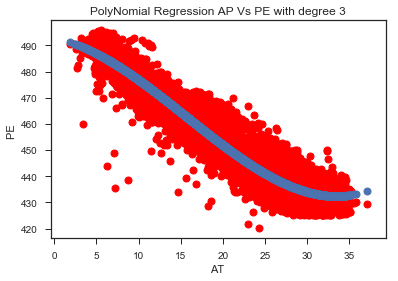

there is evidence of nonlinear association between the predictor and the response


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:26   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         492.7281      0.673    732.248      0.000     491.409     494.047
AT                 -0.6103      0.124     -4.941      0.000      -0.852      -0.368
np.power(AT, 2)    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
np.power(AT, 3)     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# Polynominals Regression
poly = PolynomialFeatures(degree= 3,include_bias = False)
poly_features1 = poly.fit_transform(inf552[['AT']])
poly.fit(inf552[['AT']],inf552[['PE']])
poly_regression1 = LinearRegression()
result1=poly_regression1.fit(poly_features1,inf552[['PE']])
#ploting the data  for polynomial regression 
plt.scatter(inf552[['AT']],inf552[['PE']],color='red',linewidths=1)
plt.scatter(inf552[['AT']],poly_regression1.predict(poly_features1),linewidths=1)
plt.title("PolyNomial Regression AP Vs PE with degree 3")
plt.xlabel("AT ")
plt.ylabel("PE ")
plt.show()
print('there is evidence of nonlinear association between the predictor and the response')
formula11 = 'PE ~ AT + np.power(AT,2) + np.power(AT,3) '
results11 = ols(formula11, inf552).fit()
results11.summary()

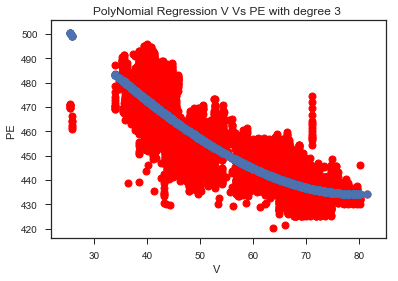

there might be no evidence of nonlinear association between the predictor and the response


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:27   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        554.1468      9.151     60.557      0.000     536.209     572.084
V                 -2.1444      0.509     -4.214      0.000      -3.142      -1.147
np.power(V, 2)    -0.0027      0.009     -0.294      0.768      -0.021       0.015
np.power(V, 3)     0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Polynominals Regression
poly = PolynomialFeatures(degree= 3,include_bias = False)
poly_features2 = poly.fit_transform(inf552[['V']])
poly.fit(inf552[['V']],inf552[['PE']])
poly_regression2 = LinearRegression()
result2=poly_regression2.fit(poly_features2,inf552[['PE']])
#ploting the data  for polynomial regression 
plt.scatter(inf552[['V']],inf552[['PE']],color='red',linewidths=1)
plt.scatter(inf552[['V']],poly_regression2.predict(poly_features2),linewidths=1)
plt.title("PolyNomial Regression V Vs PE with degree 3 ")
plt.xlabel("V ")
plt.ylabel("PE ")
plt.show()
print('there might be no evidence of nonlinear association between the predictor and the response')
formula21 = 'PE ~ V + np.power(V,2) + np.power(V,3) '
results21 = ols(formula21, inf552).fit()
results21.summary()

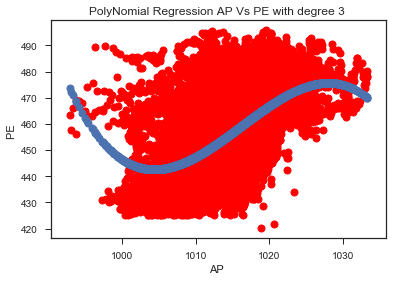

there is evidence of nonlinear association between the predictor and the response


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:27   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0747      0.009      8.415      0.000       0.057       0.092
AP                 25.2556      3.001      8.415      0.000      19.372      31.139
np.power(AP, 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
np.power(AP, 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Polynominals Regression
poly = PolynomialFeatures(degree= 3,include_bias = False)
poly_features3 = poly.fit_transform(inf552[['AP']])
poly.fit(inf552[['AP']],inf552[['PE']])
poly_regression3 = LinearRegression()
result3=poly_regression3.fit(poly_features3,inf552[['PE']])
#ploting the data  for polynomial regression 
plt.scatter(inf552[['AP']],inf552[['PE']],color='red',linewidths=1)
plt.scatter(inf552[['AP']],poly_regression3.predict(poly_features3),linewidths=1)
plt.title("PolyNomial Regression AP Vs PE with degree 3 ")
plt.xlabel("AP ")
plt.ylabel("PE ")
plt.show()
print('there is evidence of nonlinear association between the predictor and the response')
formula31 = 'PE ~ AP + np.power(AP,2) + np.power(AP,3) '
results31 = ols(formula31, inf552).fit()
results31.summary()

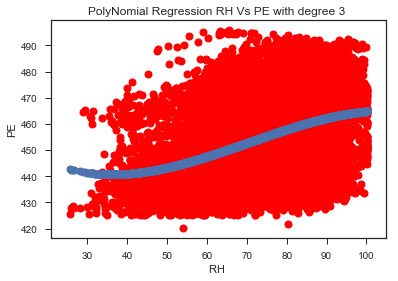

there is evidence of nonlinear association between the predictor and the response


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:28   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         468.4135     10.545     44.422      0.000     447.744     489.083
RH                 -1.7292      0.486     -3.557      0.000      -2.682      -0.776
np.power(RH, 2)     0.0321      0.007      4.433      0.000       0.018       0.046
np.power(RH, 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Polynominals Regression
poly = PolynomialFeatures(degree= 3,include_bias = False)
poly_features4 = poly.fit_transform(inf552[['RH']])
poly.fit(inf552[['RH']],inf552['PE'])
poly_regression4 = LinearRegression()
result4=poly_regression4.fit(poly_features4,inf552[['PE']])
#ploting the data  for polynomial regression 
plt.scatter(inf552['RH'],inf552['PE'],color='red',linewidths=1)
plt.scatter(inf552['RH'],poly_regression4.predict(poly_features4),linewidths=1)
plt.title("PolyNomial Regression RH Vs PE with degree 3 ")
plt.xlabel("RH ")
plt.ylabel("PE")
plt.show()
print('there is evidence of nonlinear association between the predictor and the response')
formula41 = 'PE ~ RH + np.power(RH,2) + np.power(RH,3) '
results41 = ols(formula41, inf552).fit()
results41.summary()

In [17]:
# run a full linear regression model with all pairwise interaction terms
from statsmodels.formula.api import ols
formula5 = 'PE ~ AT + V + AP + RH+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
results5 = ols(formula5, inf552).fit() 
print('According to the t-test and low p-value, AT*V and AT*RH and V*AP interaction terms are statistically signiﬁcant')
results5.summary()

According to the t-test and low p-value, AT*V and AT*RH and V*AP interaction terms are statistically signiﬁcant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:29   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Train the regression model on a randomly selected 70% subset of the data with all predictors
sample1=inf552.sample(frac=0.7,random_state=123 ,axis=0)
formula6 = 'PE ~ AT + V + AP + RH '
results61 = ols(formula6, sample1).fit()
results61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.138e+04
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:30   Log-Likelihood:                -19745.
No. Observations:                6698   AIC:                         3.950e+04
Df Residuals:                    6693   BIC:                         3.953e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.4208     11.843     37.694      0.000     423.204     469.638
AT            -1.9614      0.019   -106.005      0.000      -1.998      -1.925
V             -0.2397      0.009    -27.216      0.000      -0.257      -0.222
AP             0.0702      0.011      6.109      0.000       0.048       0.093
RH            -0.1585      0.005    -31.536      0.000      -0.168      -0.149
==============================================================================
Omnibus:                      811.515   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4617.154
Skew:                          -0.438   Prob(JB):                         0.00
Kurtosis:                       6.972   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Test the improved model on the test points 
sample2=inf552.drop(index=sample1.index)
results62 = ols(formula6, sample2).fit()
results62.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     9794.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:30   Log-Likelihood:                -8337.3
No. Observations:                2870   AIC:                         1.668e+04
Df Residuals:                    2865   BIC:                         1.671e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    473.1578     17.115     27.646      0.000     439.599     506.717
AT            -2.0139      0.027    -74.333      0.000      -2.067      -1.961
V             -0.2210      0.013    -17.100      0.000      -0.246      -0.196
AP             0.0437      0.017      2.633      0.009       0.011       0.076
RH            -0.1570      0.007    -21.062      0.000      -0.172      -0.142
==============================================================================
Omnibus:                       37.527   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.198
Skew:                          -0.117   Prob(JB):                     2.30e-13
Kurtosis:                       3.657   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# a regression model involving all possible interaction terms and quadratic nonlinearities
formula70 = 'PE ~ AT+V+AP+RH+np.power(AT,2)+AT*V+AT*AP+AT*RH+np.power(V,2)+V*AP+V*RH+np.power(AP,2)+AP*RH+ np.power(RH,2) '
results70 = ols(formula70, sample1).fit()
print('According to the p-value,insigniﬁcant variables: V*AP should be removed.')
results70.summary()

According to the p-value,insigniﬁcant variables: V*AP should be removed.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7006.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:                -19312.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6683   BIC:                         3.876e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7571.7874   1487.029     -5.092      0.000   -1.05e+04   -4656.737
AT                 -6.5051      3.758     -1.731      0.083     -13.872       0.861
V                  -2.0128      1.816     -1.109      0.268      -5.572       1.547
AP                 15.7668      2.883      5.469      0.000      10.115      21.418
RH                  3.3141      1.053      3.148      0.002       1.250       5.378
np.power(AT, 2)     0.0123      0.004      3.275      0.001       0.005       0.020
AT:V                0.0159      0.003      4.774      0.000       0.009       0.022
AT:AP               0.0038      0.004      1.047      0.295      -0.003       0.011
AT:RH              -0.0068      0.002     -3.812      0.000      -0.010      -0.003
np.power(V, 2)     -0.0024      0.001     -2.463      0.014      -0.004      -0.000
V:AP                0.0015      0.002      0.867      0.386      -0.002       0.005
V:RH                0.0013      0.001      1.628      0.104      -0.000       0.003
np.power(AP, 2)    -0.0077      0.001     -5.494      0.000      -0.010      -0.005
AP:RH              -0.0031      0.001     -3.021      0.003      -0.005      -0.001
np.power(RH, 2)    -0.0018      0.000     -5.589      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1416.342   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12293.069
Skew:                          -0.766   Prob(JB):                         0.00
Kurtosis:                       9.457   Cond. No.                     2.90e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#improve the model by removing insigniﬁcant variables: V*AP
formula71 = 'PE ~ AT+V+AP+RH+np.power(AT,2)+AT*V+AT*AP+AT*RH+np.power(V,2)+V*RH+np.power(AP,2)+AP*RH+ np.power(RH,2) '
results71 = ols(formula71, sample1).fit()
print('According to the p-value,insigniﬁcant variables: V*RH should be removed.')
results71.summary()

According to the p-value,insigniﬁcant variables: V*RH should be removed.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7545.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:32   Log-Likelihood:                -19313.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6684   BIC:                         3.875e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7423.7598   1477.162     -5.026      0.000   -1.03e+04   -4528.051
AT                 -9.0282      2.376     -3.799      0.000     -13.687      -4.370
V                  -0.4406      0.083     -5.335      0.000      -0.603      -0.279
AP                 15.4593      2.861      5.404      0.000       9.851      21.068
RH                  3.0455      1.006      3.027      0.002       1.073       5.018
np.power(AT, 2)     0.0136      0.003      3.978      0.000       0.007       0.020
AT:V                0.0147      0.003      4.831      0.000       0.009       0.021
AT:AP               0.0063      0.002      2.765      0.006       0.002       0.011
AT:RH              -0.0064      0.002     -3.712      0.000      -0.010      -0.003
np.power(V, 2)     -0.0022      0.001     -2.348      0.019      -0.004      -0.000
V:RH                0.0011      0.001      1.445      0.148      -0.000       0.003
np.power(AP, 2)    -0.0075      0.001     -5.427      0.000      -0.010      -0.005
AP:RH              -0.0028      0.001     -2.894      0.004      -0.005      -0.001
np.power(RH, 2)    -0.0018      0.000     -5.534      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1418.272   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12277.088
Skew:                          -0.768   Prob(JB):                         0.00
Kurtosis:                       9.452   Cond. No.                     2.88e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#improve the model by removing insigniﬁcant variables: V*RH
formula72 = 'PE ~ AT+V+AP+RH+np.power(AT,2)+AT*V+AT*AP+AT*RH+np.power(V,2)+np.power(AP,2)+AP*RH+ np.power(RH,2) '
results72 = ols(formula72, sample1).fit()
print('According to the p-value,insigniﬁcant variables: V^2 should be removed.')
results72.summary()

According to the p-value,insigniﬁcant variables: V^2 should be removed.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8172.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:33   Log-Likelihood:                -19314.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6685   BIC:                         3.874e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7373.2151   1476.868     -4.992      0.000   -1.03e+04   -4478.083
AT                 -9.1770      2.374     -3.865      0.000     -13.831      -4.523
V                  -0.3682      0.066     -5.610      0.000      -0.497      -0.240
AP                 15.3691      2.860      5.373      0.000       9.762      20.977
RH                  2.8883      1.000      2.887      0.004       0.927       4.849
np.power(AT, 2)     0.0166      0.003      6.000      0.000       0.011       0.022
AT:V                0.0120      0.002      4.992      0.000       0.007       0.017
AT:AP               0.0063      0.002      2.778      0.005       0.002       0.011
AT:RH              -0.0044      0.001     -4.420      0.000      -0.006      -0.002
np.power(V, 2)     -0.0017      0.001     -1.920      0.055      -0.003    3.51e-05
np.power(AP, 2)    -0.0075      0.001     -5.399      0.000      -0.010      -0.005
AP:RH              -0.0027      0.001     -2.758      0.006      -0.005      -0.001
np.power(RH, 2)    -0.0016      0.000     -5.446      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1415.702   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12205.933
Skew:                          -0.768   Prob(JB):                         0.00
Kurtosis:                       9.433   Cond. No.                     2.87e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#improve the model by removing insigniﬁcant variables: V^2
formula73 = 'PE ~ AT+V+AP+RH+np.power(AT,2)+AT*V+AT*AP+AT*RH+np.power(AP,2)+AP*RH+ np.power(RH,2) '
results73 = ols(formula73, sample1).fit()
print('According to the p-value,no insigniﬁcant variables should be removed.')
results73.summary()

According to the p-value,no insigniﬁcant variables should be removed.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8911.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:34   Log-Likelihood:                -19316.
No. Observations:                6698   AIC:                         3.866e+04
Df Residuals:                    6686   BIC:                         3.874e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7456.1509   1476.533     -5.050      0.000   -1.04e+04   -4561.676
AT                 -9.1347      2.375     -3.847      0.000     -13.790      -4.480
V                  -0.4774      0.033    -14.588      0.000      -0.542      -0.413
AP                 15.5246      2.860      5.428      0.000       9.918      21.131
RH                  3.0042      0.999      3.008      0.003       1.046       4.962
np.power(AT, 2)     0.0190      0.002      7.786      0.000       0.014       0.024
AT:V                0.0084      0.001      5.649      0.000       0.005       0.011
AT:AP               0.0064      0.002      2.810      0.005       0.002       0.011
AT:RH              -0.0046      0.001     -4.656      0.000      -0.007      -0.003
np.power(AP, 2)    -0.0076      0.001     -5.452      0.000      -0.010      -0.005
AP:RH              -0.0028      0.001     -2.870      0.004      -0.005      -0.001
np.power(RH, 2)    -0.0016      0.000     -5.605      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1417.454   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12171.766
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.422   Cond. No.                     2.87e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Test the improved model on the test points 
results74 = ols(formula73, sample2).fit()
results74.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     4224.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:36:35   Log-Likelihood:                -8104.6
No. Observations:                2870   AIC:                         1.623e+04
Df Residuals:                    2858   BIC:                         1.630e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7193.4926   2036.012     -3.533      0.000   -1.12e+04   -3201.291
AT                -11.8122      3.414     -3.460      0.001     -18.505      -5.119
V                  -0.4098      0.046     -8.923      0.000      -0.500      -0.320
AP                 14.9513      3.944      3.791      0.000       7.217      22.685
RH                  4.4858      1.505      2.981      0.003       1.535       7.437
np.power(AT, 2)     0.0231      0.004      6.409      0.000       0.016       0.030
AT:V                0.0062      0.002      2.944      0.003       0.002       0.010
AT:AP               0.0091      0.003      2.791      0.005       0.003       0.016
AT:RH              -0.0065      0.002     -4.352      0.000      -0.009      -0.004
np.power(AP, 2)    -0.0073      0.002     -3.793      0.000      -0.011      -0.004
AP:RH              -0.0041      0.001     -2.795      0.005      -0.007      -0.001
np.power(RH, 2)    -0.0025      0.000     -5.918      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       90.777   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.731
Skew:                          -0.290   Prob(JB):                     3.73e-32
Kurtosis:                       3.935   Cond. No.                     2.75e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
table6=PrettyTable(["1st model "," TRAIN","TEST"])
table6.add_row(["MSE",results61.mse_resid,results62.mse_resid])
print(table6)
table7=PrettyTable(["2nd model "," TRAIN","TEST"])
table7.add_row(["MSE",results73.mse_resid,results74.mse_resid])
print(table7)
print('I can improve the original model using possible interaction terms and nonlinear associations between the predictors and response')

+------------+--------------------+--------------------+
| 1st model  |        TRAIN       |        TEST        |
+------------+--------------------+--------------------+
|    MSE     | 21.296849621333582 | 19.566575600969124 |
+------------+--------------------+--------------------+
+------------+-------------------+--------------------+
| 2nd model  |        TRAIN      |        TEST        |
+------------+-------------------+--------------------+
|    MSE     | 18.75625801645269 | 16.678343350224885 |
+------------+-------------------+--------------------+
I can improve the original model using possible interaction terms and nonlinear associations between the predictors and response


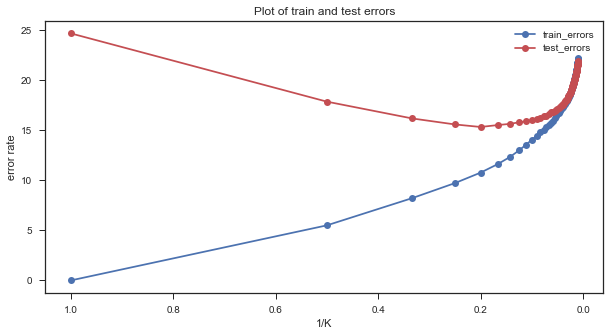

the k for the best fit is 5


In [31]:
#k-nearest neighbor regression using raw features
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
a=tuple(range(1,101))
train_errors=[]
test_errors=[]
min_rate1=float(inf);min_rate2=float(inf);
for i in a:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(sample1.iloc[:,0:4], sample1['PE']) 
    inf_train_pred=neigh.predict(sample1.iloc[:,0:4])
    train_error = mean_squared_error(sample1['PE'], inf_train_pred)
    #train_error = 1-neigh.score(sample1.iloc[:,0:4], sample1['PE'])
    train_errors.append(train_error)
    inf_test_pred=neigh.predict(sample2.iloc[:,0:4])
    test_error = mean_squared_error(sample2['PE'], inf_test_pred)
    #test_error = 1-neigh.score(sample2.iloc[:,0:4], sample2['PE'])
    test_errors.append(test_error)
    if train_error < min_rate1:
        min_rate1=train_error
    if test_error < min_rate2:
        min_rate2=test_error
        k=i
errors={"train_errors":train_errors,"test_errors":test_errors}
errors=DataFrame(errors)
errors.index = range(1,101)
plt.figure(figsize=(10,5))
xlist1 = errors.iloc[:,0]
xlist2 = errors.iloc[:,1]
ylist = list(map(lambda x:1/x,range(1,101)))
plt.title("Plot of train and test errors") 
plt.xlabel("1/K")
plt.ylabel("error rate")
plt.plot(ylist,xlist1,"b-o")
plt.plot(ylist,xlist2,"r-o")
plt.gca().invert_xaxis() 
plt.legend(loc='best')
plt.show()
print("the k for the best fit is",k)

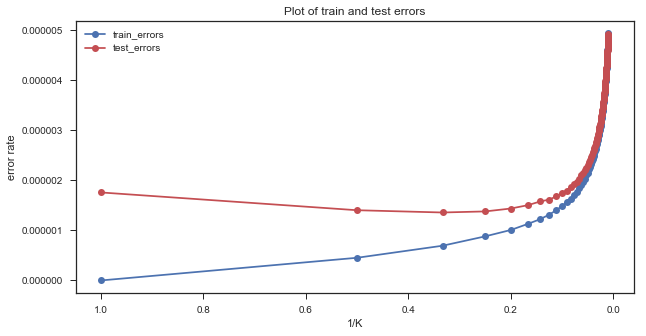

the k for the best fit is 3


In [27]:
#k-nearest neighbor regression using normalized features
from sklearn import preprocessing
train_normalized = preprocessing.normalize(sample1, norm='l2')
test_normalized = preprocessing.normalize(sample2, norm='l2')
train_normalized = pd.DataFrame(train_normalized)
test_normalized = pd.DataFrame(test_normalized)
train_errors2=[]
test_errors2=[]
min_rate3=float(inf);min_rate4=float(inf);
for i in a:
    neigh2 = KNeighborsRegressor(n_neighbors=i)
    neigh2.fit(train_normalized.iloc[:,0:4], train_normalized.iloc[:,4]) 
    inf_train_pred2=neigh2.predict(train_normalized.iloc[:,0:4])
    train_error2 = mean_squared_error(train_normalized.iloc[:,4], inf_train_pred2)
    train_errors2.append(mean_squared_error(train_normalized.iloc[:,4], inf_train_pred2))
    inf_test_pred2=neigh2.predict(test_normalized.iloc[:,0:4])
    test_error2 = mean_squared_error(test_normalized.iloc[:,4], inf_test_pred2)
    test_errors2.append(mean_squared_error(test_normalized.iloc[:,4], inf_test_pred2))
    if train_error2 < min_rate3:
        min_rate3=train_error2
        k2=i
    if test_error2 < min_rate4:
        min_rate4=test_error2
        k2=i
errors2={"train_errors":train_errors2,"test_errors":test_errors2}
errors2=DataFrame(errors2)
errors2.index = range(1,101)
plt.figure(figsize=(10,5))
xlist12 = errors2.iloc[:,0]
xlist22 = errors2.iloc[:,1]
ylist2 = list(map(lambda x:1/x,range(1,101)))
plt.title("Plot of train and test errors") 
plt.xlabel("1/K")
plt.ylabel("error rate")
plt.plot(ylist2,xlist12,"b-o")
plt.plot(ylist2,xlist22,"r-o")
plt.gca().invert_xaxis() 
plt.legend(loc='best')
plt.show()
print("the k for the best fit is",k2)

In [33]:
table8=PrettyTable(["linear regression"," MSE"])
table8.add_row([" PE ~ AT",results1.mse_resid])
table8.add_row([" PE ~ V",results2.mse_resid])
table8.add_row([" PE ~ AP",results3.mse_resid])
table8.add_row([" PE ~ RH",results4.mse_resid])
table8.add_row([" PE ~ AT + V + AP + RH",results62.mse_resid])
table8.add_row([" PE ~ AT + V + AP + RH+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH",results5.mse_resid])
print(table8)
table9=PrettyTable(["knn regression","TEST MSE"])
table9.add_row(["MSE(raw)",min_rate2])
table9.add_row(["MSE(normalized)",min_rate4])
print(table9)

+--------------------------------------------------------------------+--------------------+
|                         linear regression                          |         MSE        |
+--------------------------------------------------------------------+--------------------+
|                               PE ~ AT                              | 29.437855408963276 |
|                               PE ~ V                               |  70.9294774259713  |
|                               PE ~ AP                              | 213.01702680361203 |
|                               PE ~ RH                              | 247.0508691609319  |
|                        PE ~ AT + V + AP + RH                       | 19.566575600969124 |
|  PE ~ AT + V + AP + RH+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH | 18.57242095798433  |
+--------------------------------------------------------------------+--------------------+
+-----------------+------------------------+
|  knn regression |        TEST MSE

In [30]:
print('conclusion:(1)If there is a large number of observations per predictor, then knn methods works better')
print('conclusion:(2)When the true relationship between X and Y is not exactly linear, KNN outperforms linear regression for K>=5.')

conclusion:(1)If there is a large number of observations per predictor, then knn methods works better
conclusion:(2)When the true relationship between X and Y is not exactly linear, KNN outperforms linear regression for K>=5.
